In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
file_path = 'customer_segmentation.xlsx'
df = pd.read_excel('/kaggle/input/clusered-data/Clustered Data.xlsx')


In [44]:
print("Data preview:")
print(df.head())

Data preview:
   Customer_ID  Age  Gender  Annual_Income  Spending_Score  Total_Purchases  \
0            1   25  Female          30000              55               15   
1            2   45    Male          75000              45               20   
2            3   35  Female          50000              65               12   
3            4   50    Male         100000              35               10   
4            5   29  Female          40000              70               25   

  Last_Purchase_Date  
0         2024-08-01  
1         2024-07-15  
2         2024-08-05  
3         2024-06-25  
4         2024-08-10  


In [45]:
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])
df['Last_Purchase_Days'] = (pd.Timestamp('now') - df['Last_Purchase_Date']).dt.days

In [46]:
features = df[['Age', 'Annual_Income', 'Spending_Score', 'Total_Purchases', 'Last_Purchase_Days']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [47]:
from sklearn.cluster import KMeans

# Define the number of clusters
optimal_k = 4

In [48]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [49]:
print("\nDescriptive Statistics by Cluster:")
print(df.groupby('Cluster').describe())


Descriptive Statistics by Cluster:
        Customer_ID                                                 Age  \
              count      mean  min  25%  50%  75%   max       std count   
Cluster                                                                   
0               4.0  5.500000  1.0  2.5  5.5  8.5  10.0  4.203173   4.0   
1               3.0  5.666667  2.0  4.0  6.0  7.5   9.0  3.511885   3.0   
2               1.0  4.000000  4.0  4.0  4.0  4.0   4.0       NaN   1.0   
3               2.0  6.000000  5.0  5.5  6.0  6.5   7.0  1.414214   2.0   

                    ...   Last_Purchase_Date      Last_Purchase_Days  \
              mean  ...                  max  std              count   
Cluster             ...                                                
0        31.500000  ...  2024-08-08 00:00:00  NaN                4.0   
1        42.333333  ...  2024-07-30 00:00:00  NaN                3.0   
2        50.000000  ...  2024-06-25 00:00:00  NaN                1.0   
3     

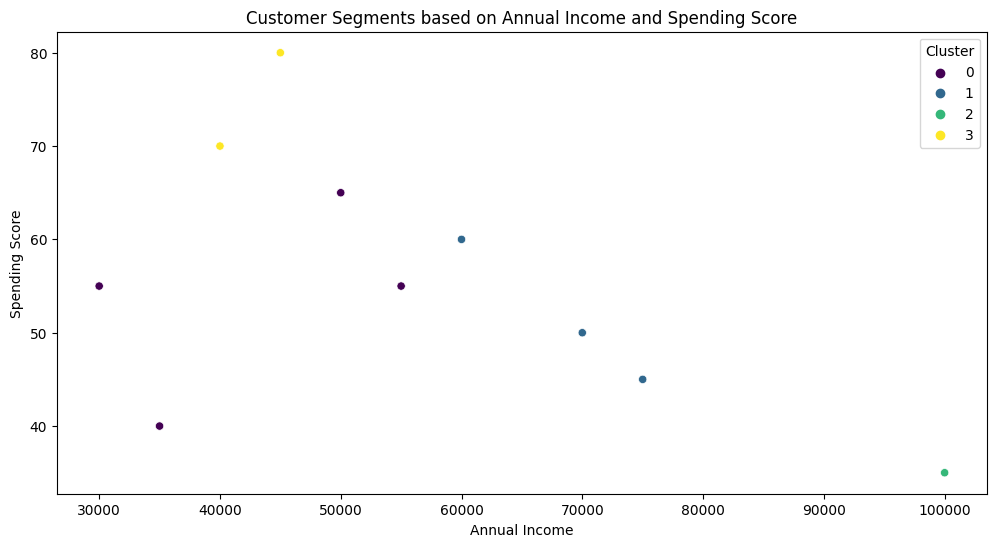

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

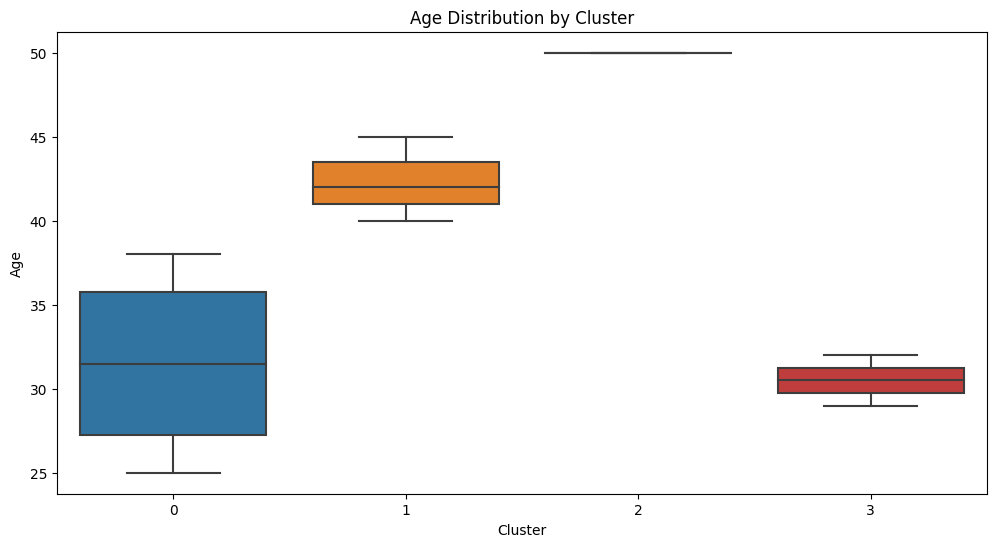

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cluster', y='Age')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

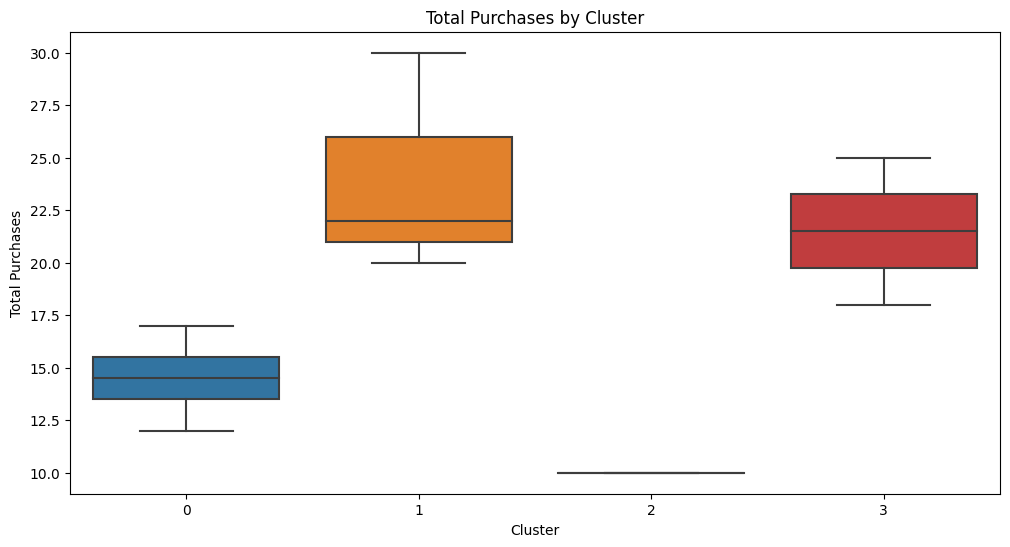

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cluster', y='Total_Purchases')
plt.title('Total Purchases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Purchases')
plt.show()

In [59]:
for cluster in df['Cluster'].unique():
    cluster_df = df[df['Cluster'] == cluster]
    avg_income = cluster_df['Annual_Income'].mean()
    avg_spending = cluster_df['Spending_Score'].mean()
    print(f"\nCluster {cluster}:")
    print(f"Average Annual Income: {avg_income}")
    print(f"Average Spending Score: {avg_spending}")
    print(f"Number of Customers in Cluster: {len(cluster_df)}")

    if avg_income > 50000 and avg_spending > 60:
        print("Recommendation: Target premium products and exclusive offers for this high-value segment.")
    elif avg_income < 50000 and avg_spending > 50:
        print("Recommendation: Consider loyalty programs and promotions to increase retention.")
    else:
        print("Recommendation: Focus on improving customer engagement and value propositions.")


Cluster 0:
Average Annual Income: 42500.0
Average Spending Score: 53.75
Number of Customers in Cluster: 4
Recommendation: Consider loyalty programs and promotions to increase retention.

Cluster 1:
Average Annual Income: 68333.33333333333
Average Spending Score: 51.666666666666664
Number of Customers in Cluster: 3
Recommendation: Focus on improving customer engagement and value propositions.

Cluster 2:
Average Annual Income: 100000.0
Average Spending Score: 35.0
Number of Customers in Cluster: 1
Recommendation: Focus on improving customer engagement and value propositions.

Cluster 3:
Average Annual Income: 42500.0
Average Spending Score: 75.0
Number of Customers in Cluster: 2
Recommendation: Consider loyalty programs and promotions to increase retention.
